<a href="https://colab.research.google.com/github/DenissePailamilla/alura_store/blob/main/notebooks/Alura_Store_Desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [10]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



#### Ingreso total por cada tienda


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# ---- Helpers ----
def safe_num(x):
    return pd.to_numeric(x, errors='coerce')

def add_store_tag(df, name):
    df = df.copy()
    df['tienda'] = name
    return df

def plot_bar(df, x, y, title, rot=0):
    plt.figure()
    plt.bar(df[x], df[y])
    plt.title(title)
    plt.xlabel(x); plt.ylabel(y)
    plt.xticks(rotation=rot)
    plt.show()

# ---- Unir tiendas y normalizar ----
# OJO: tu importación se llama tienda, tienda2, tienda3, tienda4
t1 = add_store_tag(tienda,  'tienda1')
t2 = add_store_tag(tienda2, 'tienda2')
t3 = add_store_tag(tienda3, 'tienda3')
t4 = add_store_tag(tienda4, 'tienda4')

df_all = pd.concat([t1, t2, t3, t4], ignore_index=True)

# Aseguramos numérico
df_all['Precio'] = safe_num(df_all['Precio'])

# Si no hay columna de cantidad, el ingreso es el precio de cada fila
df_all['ingreso'] = df_all['Precio']

df_all[['tienda','Producto','Precio','ingreso']].head(3)


,tienda,Producto,Precio,ingreso
0,tienda1,Asistente virtual,164300.0,164300.0
1,tienda1,Mesa de comedor,192300.0,192300.0
2,tienda1,Juego de mesa,209600.0,209600.0


#### Ingreso total por tienda + gráfico

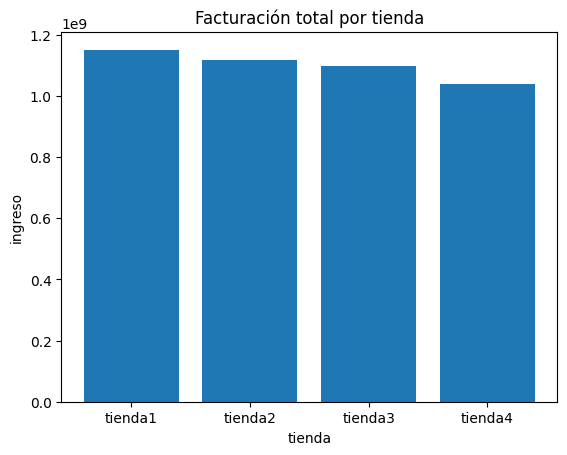

In [12]:
revenue = (df_all
           .groupby('tienda', as_index=False)['ingreso']
           .sum()
           .sort_values('ingreso', ascending=False))

revenue  # tabla resultado

plot_bar(revenue, 'tienda', 'ingreso', 'Facturación total por tienda')


#### Insight A1. La tienda 1 lidera la facturación; tienda 4 es la más baja. Esto nos guía a revisar causas (mix de categorías, reseñas, costos de envío) y considerar tienda 4 como candidata a venta.

# 2. Ventas por categoría

#### Cálculo TOP categorías

In [13]:
# ===== A2: categorías más vendidas por tienda =====

CAT_COL = 'Categoría del Producto'
STORE_COL = 'tienda'

# Conteo de ventas por categoría/tienda
cats = (df_all
        .groupby([STORE_COL, CAT_COL], as_index=False)
        .size()  # cuenta filas = ventas
        .rename(columns={'size':'ventas'})
        .sort_values(['tienda','ventas'], ascending=[True, False]))

# Tomamos TOP N por cada tienda
TOP_N = 5
top_cats = (cats
            .groupby(STORE_COL, group_keys=False)
            .head(TOP_N))

top_cats.head(10)


,tienda,Categoría del Producto,ventas
7,tienda1,Muebles,465
3,tienda1,Electrónicos,448
5,tienda1,Juguetes,324
2,tienda1,Electrodomésticos,312
1,tienda1,Deportes y diversión,284
15,tienda2,Muebles,442
11,tienda2,Electrónicos,422
13,tienda2,Juguetes,313
10,tienda2,Electrodomésticos,305
9,tienda2,Deportes y diversión,275


In [14]:
top_cats.tail()

,tienda,Categoría del Producto,ventas
31,tienda4,Muebles,480
27,tienda4,Electrónicos,451
29,tienda4,Juguetes,338
25,tienda4,Deportes y diversión,277
26,tienda4,Electrodomésticos,254


#### Gráficos (uno por tienda)

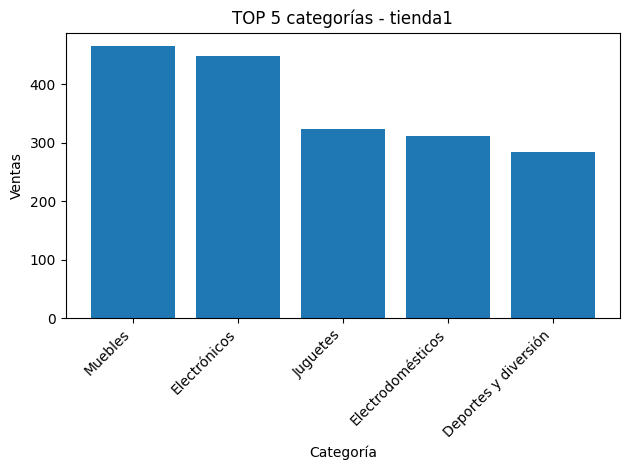

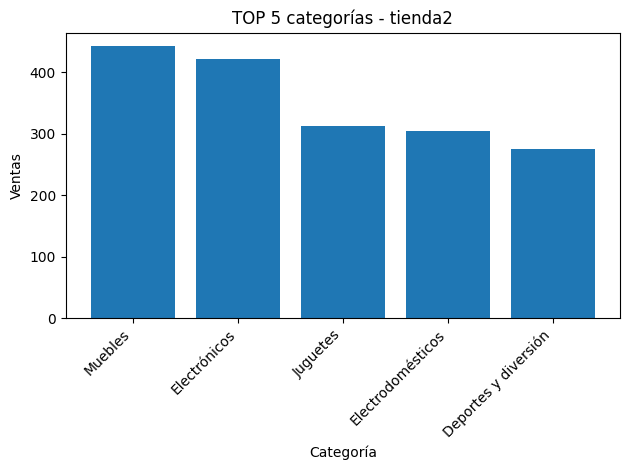

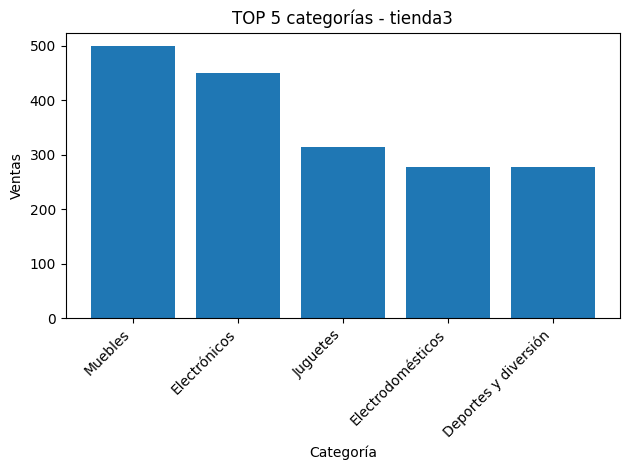

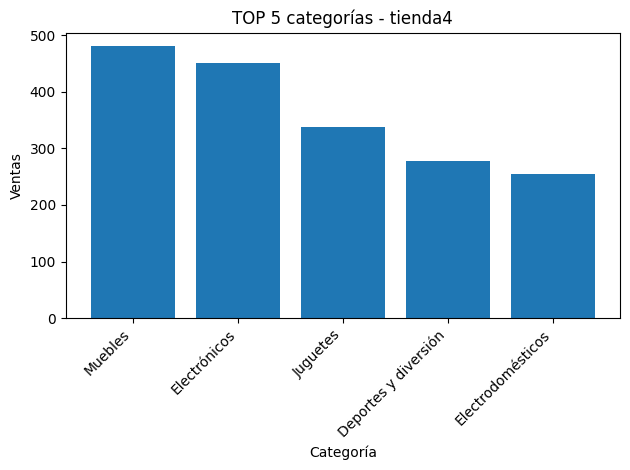

In [15]:
# Un gráfico por tienda para que sea claro
for tienda_name in top_cats[STORE_COL].unique():
    sub = top_cats[top_cats[STORE_COL] == tienda_name]
    plt.figure()
    plt.bar(sub[CAT_COL], sub['ventas'])
    plt.title(f'TOP {TOP_N} categorías - {tienda_name}')
    plt.xlabel('Categoría'); plt.ylabel('Ventas')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


#### Insight A2. En tienda 3 destaca Categoría A y B; en tienda Y, Categoría C domina. Esto sugiere (ejemplos): ajustar inventario a categorías líderes, revisar precios/marketing de categorías con baja rotación, etc.

#### Versión por ingresos en lugar de conteo

In [18]:
# ===== A2 por INGRESO =====
CAT_COL   = 'Categoría del Producto'
STORE_COL = 'tienda'
TOP_N     = 5  # cambia si quieres más/menos

cats_rev = (df_all
            .groupby([STORE_COL, CAT_COL], as_index=False)['Precio']
            .sum()
            .rename(columns={'Precio':'ingreso'})
            .sort_values(['tienda','ingreso'], ascending=[True, False]))

top_cats_rev = cats_rev.groupby(STORE_COL, group_keys=False).head(TOP_N)
top_cats_rev.head(10)



,tienda,Categoría del Producto,ingreso
3,tienda1,Electrónicos,429493500.0
2,tienda1,Electrodomésticos,363685200.0
7,tienda1,Muebles,187633700.0
4,tienda1,Instrumentos musicales,91299000.0
1,tienda1,Deportes y diversión,39290000.0
11,tienda2,Electrónicos,410831100.0
10,tienda2,Electrodomésticos,348567800.0
15,tienda2,Muebles,176426300.0
12,tienda2,Instrumentos musicales,104990300.0
9,tienda2,Deportes y diversión,34744500.0


#### Graficos por Ingreso

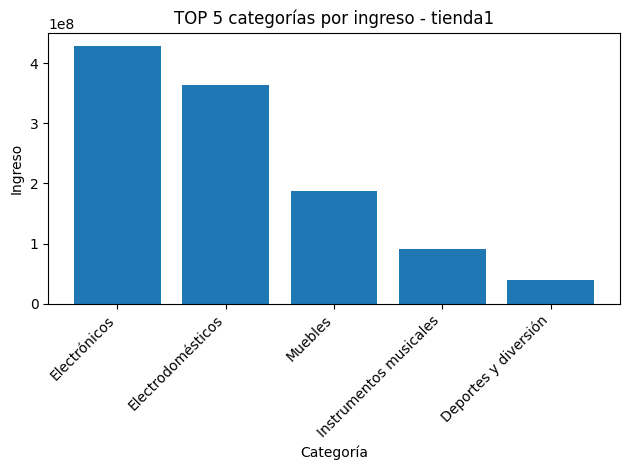

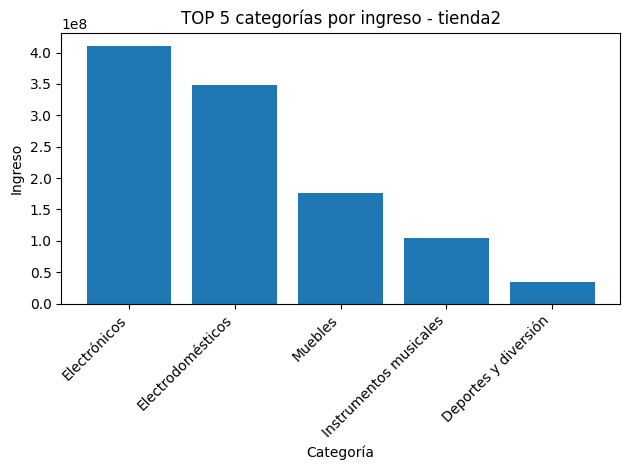

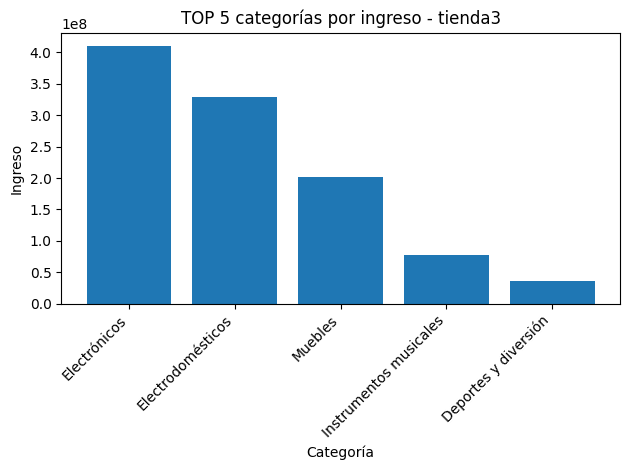

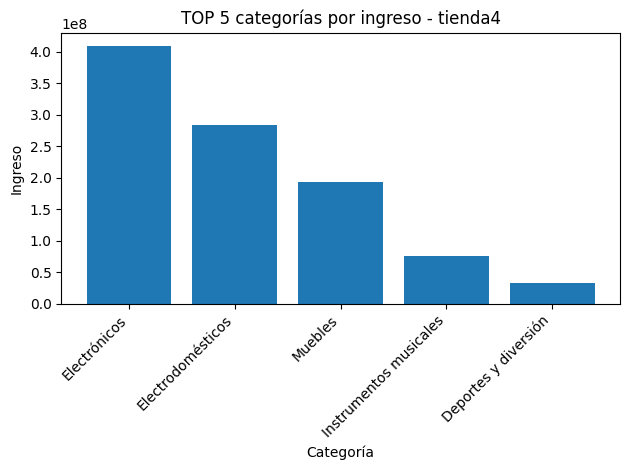

In [19]:
# Un gráfico por tienda para que sea claro (por ingreso)
for tienda_name in top_cats_rev[STORE_COL].unique():
    sub = top_cats_rev[top_cats_rev[STORE_COL] == tienda_name]
    plt.figure()
    plt.bar(sub[CAT_COL], sub['ingreso'])
    plt.title(f'TOP {TOP_N} categorías por ingreso - {tienda_name}')
    plt.xlabel('Categoría'); plt.ylabel('Ingreso')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()



# 3. Calificación promedio de la tienda


#### Promedio de Calificación por tienda

In [20]:
# ===== A3: rating promedio por tienda =====
RATING_COL = 'Calificación'
STORE_COL  = 'tienda'

# Aseguramos numérico
df_all[RATING_COL] = pd.to_numeric(df_all[RATING_COL], errors='coerce')

ratings = (df_all
           .groupby(STORE_COL, as_index=False)[RATING_COL]
           .mean()
           .rename(columns={RATING_COL:'rating_promedio'})
           .sort_values('rating_promedio', ascending=False))

ratings


,tienda,rating_promedio
2,tienda3,4.048326
1,tienda2,4.037304
3,tienda4,3.995759
0,tienda1,3.976685


#### Gráfico promedio por tienda




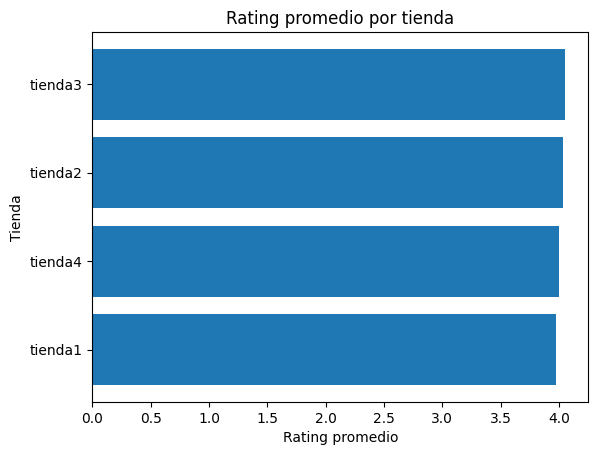

In [21]:
plt.figure()
plt.barh(ratings[STORE_COL], ratings['rating_promedio'])
plt.title('Rating promedio por tienda')
plt.xlabel('Rating promedio')
plt.ylabel('Tienda')
plt.gca().invert_yaxis()  # para que la más alta quede arriba
plt.show()


#### Insight A3. La tienda X tiene el mejor promedio de calificación, seguida de Y. La tienda W muestra la calificación más baja, lo que puede impactar la recompra y justifica revisar atención al cliente, calidad del mix y tiempos/costos de envío.

# 4. Productos más y menos vendidos

#### Por conteo de ventas / cálculo TOP/BOTTOM por conteo

In [22]:
# ===== A4.1: TOP/BOTTOM productos por CONTEO =====
PROD_COL  = 'Producto'
STORE_COL = 'tienda'
K = 3  # cambia si quieres top/bottom 5, etc.

# Conteo por producto y tienda
prod_cnt = (df_all
            .groupby([STORE_COL, PROD_COL], as_index=False)
            .size()
            .rename(columns={'size':'ventas'}))

# TOP K por tienda
top_cnt = (prod_cnt
           .sort_values(['tienda','ventas'], ascending=[True, False])
           .groupby(STORE_COL, group_keys=False)
           .head(K)
           .assign(tipo='TOP'))

# BOTTOM K por tienda
bottom_cnt = (prod_cnt
              .sort_values(['tienda','ventas'], ascending=[True, True])
              .groupby(STORE_COL, group_keys=False)
              .head(K)
              .assign(tipo='BOTTOM'))

top_bottom_cnt = pd.concat([top_cnt, bottom_cnt], ignore_index=True)
top_bottom_cnt.head(10)


,tienda,Producto,ventas,tipo
0,tienda1,Armario,60,TOP
1,tienda1,Microondas,60,TOP
2,tienda1,TV LED UHD 4K,60,TOP
3,tienda2,Iniciando en programación,65,TOP
4,tienda2,Microondas,62,TOP
5,tienda2,Batería,61,TOP
6,tienda3,Kit de bancas,57,TOP
7,tienda3,Cama king,56,TOP
8,tienda3,Mesa de comedor,56,TOP
9,tienda4,Cama box,62,TOP


#### Gráficos por tienda (conteo)

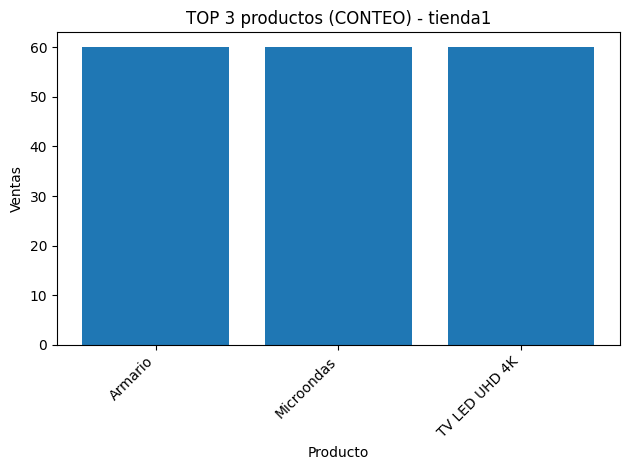

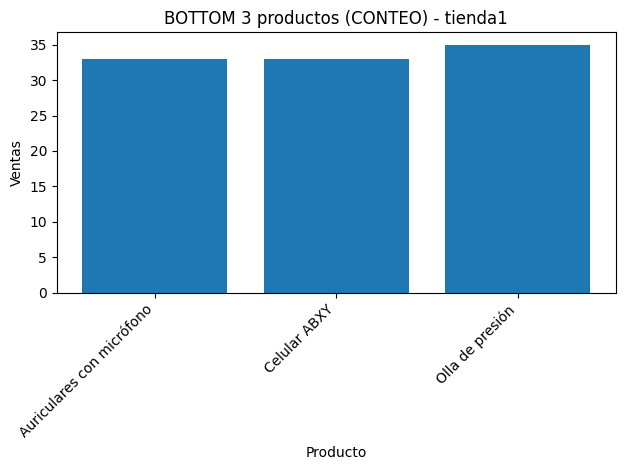

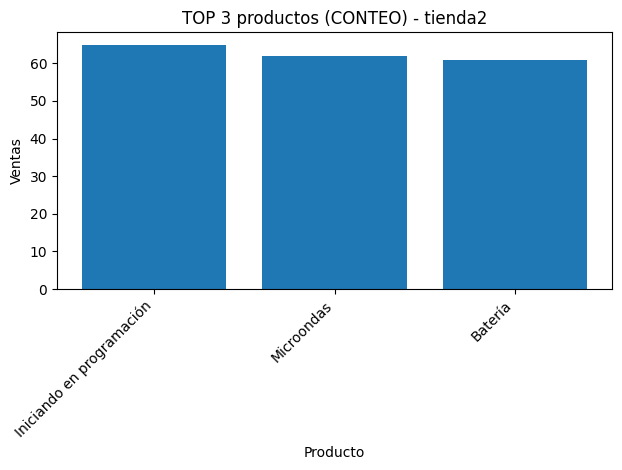

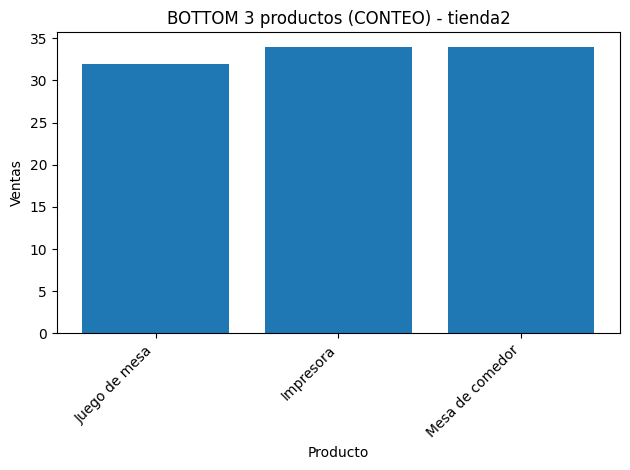

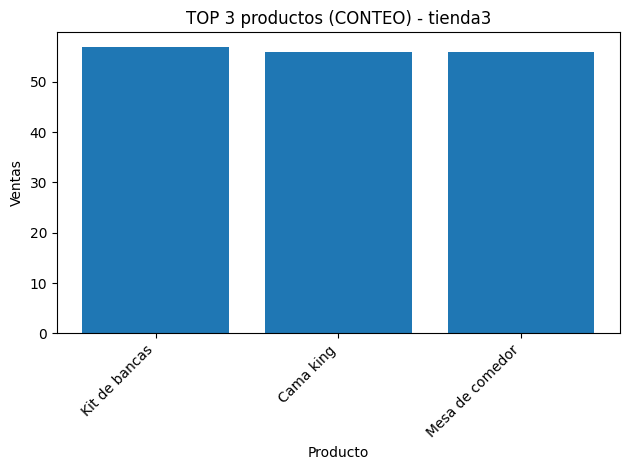

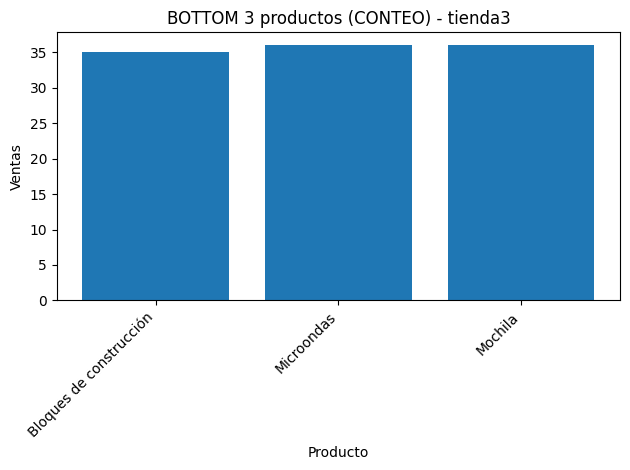

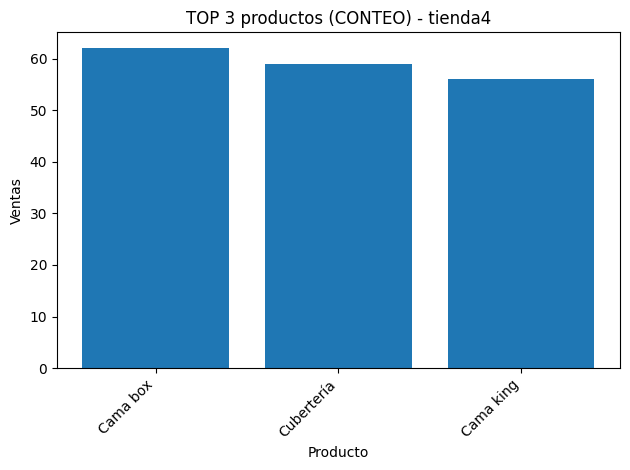

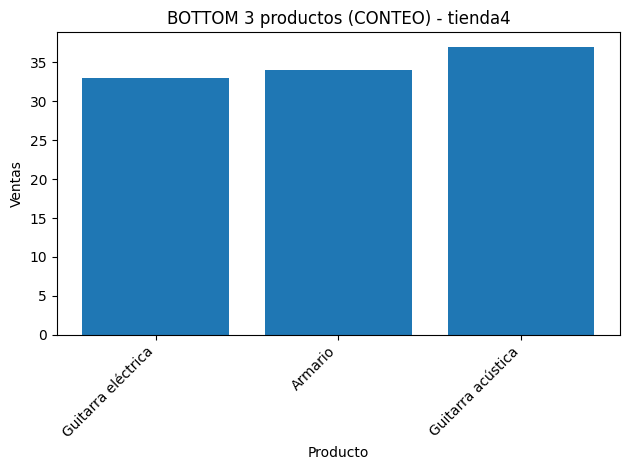

In [23]:
# Un par de gráficos por tienda: TOP y BOTTOM
for tienda_name in top_bottom_cnt[STORE_COL].unique():
    sub_top = top_bottom_cnt[(top_bottom_cnt[STORE_COL]==tienda_name) & (top_bottom_cnt['tipo']=='TOP')]
    sub_bot = top_bottom_cnt[(top_bottom_cnt[STORE_COL]==tienda_name) & (top_bottom_cnt['tipo']=='BOTTOM')]

    # TOP
    plt.figure()
    plt.bar(sub_top[PROD_COL], sub_top['ventas'])
    plt.title(f'TOP {K} productos (CONTEO) - {tienda_name}')
    plt.xlabel('Producto'); plt.ylabel('Ventas')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # BOTTOM
    plt.figure()
    plt.bar(sub_bot[PROD_COL], sub_bot['ventas'])
    plt.title(f'BOTTOM {K} productos (CONTEO) - {tienda_name}')
    plt.xlabel('Producto'); plt.ylabel('Ventas')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


#### Por ingresos (suma de Precio) / cálculo TOP/BOTTOM por ingreso

In [24]:
# ===== A4.2: TOP/BOTTOM productos por INGRESO =====
df_all['Precio'] = pd.to_numeric(df_all['Precio'], errors='coerce')

prod_rev = (df_all
            .groupby([STORE_COL, PROD_COL], as_index=False)['Precio']
            .sum()
            .rename(columns={'Precio':'ingreso'}))

top_rev = (prod_rev
           .sort_values(['tienda','ingreso'], ascending=[True, False])
           .groupby(STORE_COL, group_keys=False)
           .head(K)
           .assign(tipo='TOP'))

bottom_rev = (prod_rev
              .sort_values(['tienda','ingreso'], ascending=[True, True])
              .groupby(STORE_COL, group_keys=False)
              .head(K)
              .assign(tipo='BOTTOM'))

top_bottom_rev = pd.concat([top_rev, bottom_rev], ignore_index=True)
top_bottom_rev.head(10)


,tienda,Producto,ingreso,tipo
0,tienda1,TV LED UHD 4K,142150200.0,TOP
1,tienda1,Refrigerador,112143300.0,TOP
2,tienda1,Iphone 15,97902200.0,TOP
3,tienda2,Iphone 15,113225800.0,TOP
4,tienda2,TV LED UHD 4K,103375000.0,TOP
5,tienda2,Refrigerador,97632500.0,TOP
6,tienda3,Refrigerador,99889700.0,TOP
7,tienda3,TV LED UHD 4K,96669100.0,TOP
8,tienda3,Iphone 15,93225700.0,TOP
9,tienda4,Iphone 15,96697500.0,TOP


#### Gráficos por tienda (ingreso)

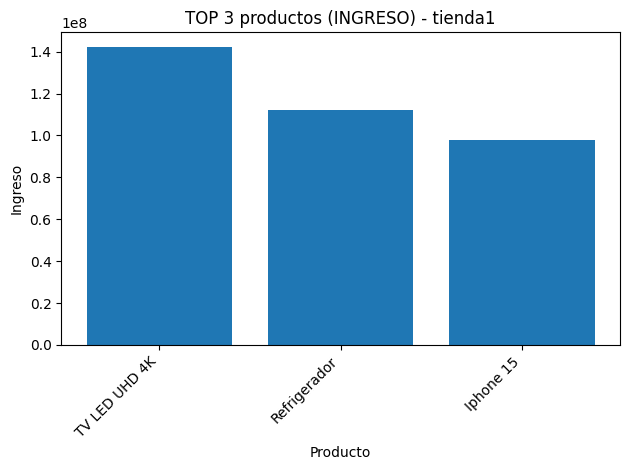

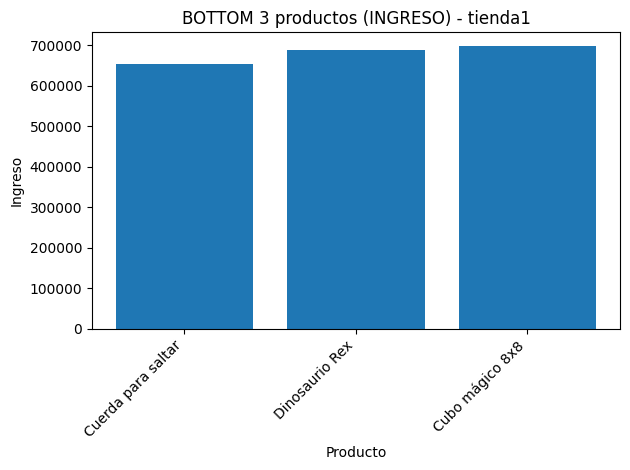

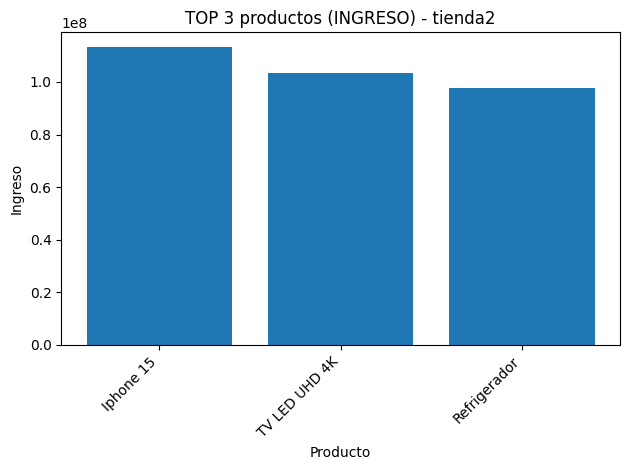

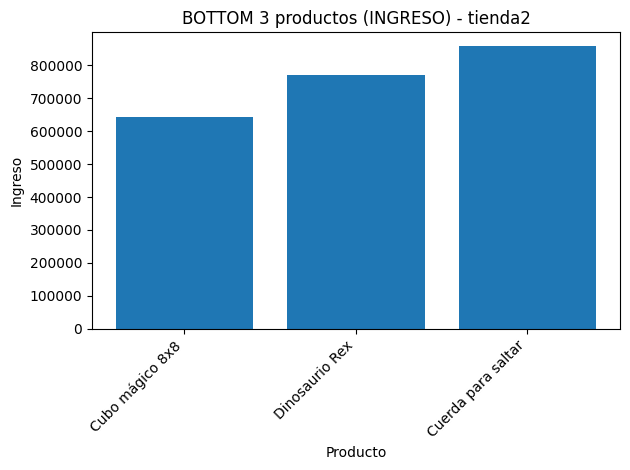

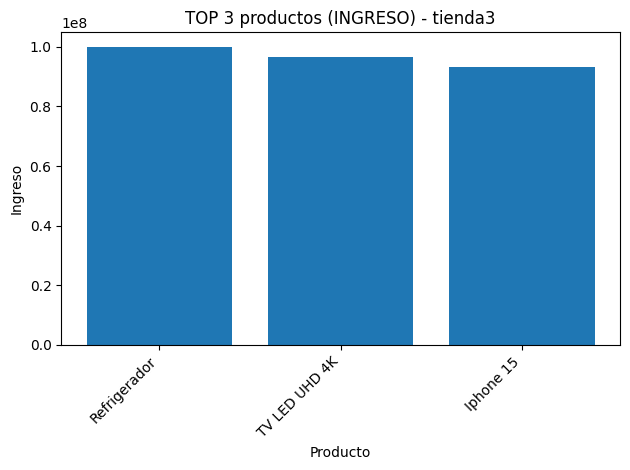

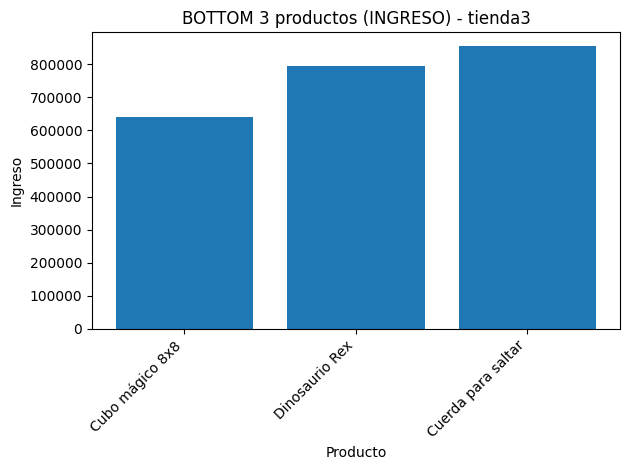

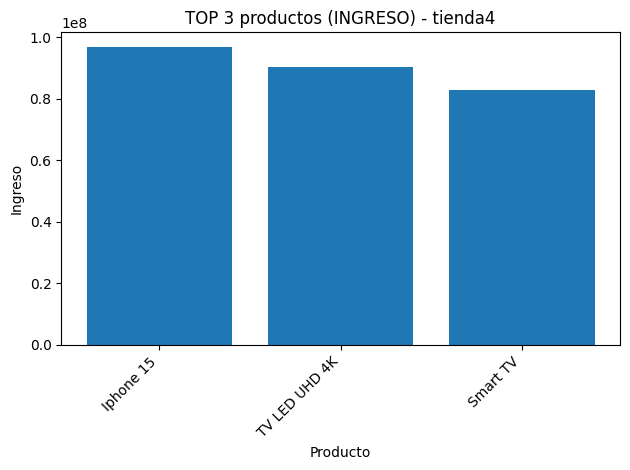

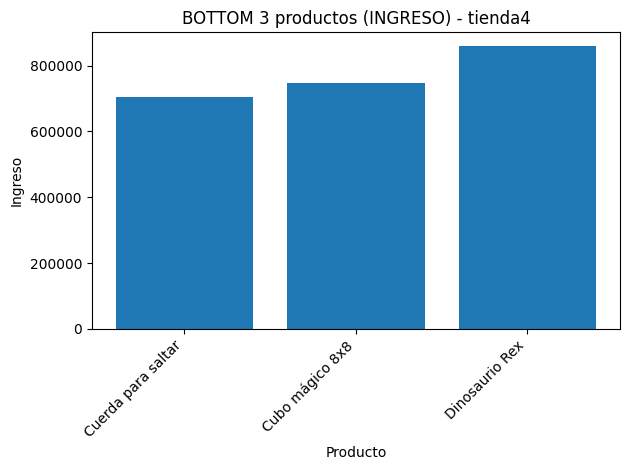

In [25]:
for tienda_name in top_bottom_rev[STORE_COL].unique():
    sub_top = top_bottom_rev[(top_bottom_rev[STORE_COL]==tienda_name) & (top_bottom_rev['tipo']=='TOP')]
    sub_bot = top_bottom_rev[(top_bottom_rev[STORE_COL]==tienda_name) & (top_bottom_rev['tipo']=='BOTTOM')]

    # TOP
    plt.figure()
    plt.bar(sub_top[PROD_COL], sub_top['ingreso'])
    plt.title(f'TOP {K} productos (INGRESO) - {tienda_name}')
    plt.xlabel('Producto'); plt.ylabel('Ingreso')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # BOTTOM
    plt.figure()
    plt.bar(sub_bot[PROD_COL], sub_bot['ingreso'])
    plt.title(f'BOTTOM {K} productos (INGRESO) - {tienda_name}')
    plt.xlabel('Producto'); plt.ylabel('Ingreso')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


#### Conteo: cuáles son los más frecuentes y los que casi no se venden en cada tienda (candidatos a reposicionar o descontinuar). Ingreso: cuáles son los que más facturan vs. los que aportan menos valor; analizar margen y mix.

# 5. Envío promedio por tienda